<a href="https://colab.research.google.com/github/Cathriel/wv72_tf_201711028_20181g907_201913412_201912712_201913425/blob/main/CreatePointsDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.random as npr

n = npr.randint(2500,5000)
m = npr.randint(50,100)
nFilas=1000
nColumnas=1000
array1 = npr.randint(0, nFilas, (n, 2), dtype=np.int)
array2 = npr.randint(0,nColumnas, (m, 2), dtype=np.int)
print(n,m)

4021 93


In [ ]:
def DeleteEqualsAndSort(array):
  points = list()
  for i in range(len(array)):
    toAdd = (array[i][0],array[i][1])
    points.append(toAdd)
  
  for i in range(len(points)):
    j=i
    while j < len(points)-1:
      j+=1
      if points[i][1]>points[j][1]:
        points[i],points[j]=points[j],points[i]
      elif points[i][1]==points[j][1]:
        if points[i][0]>points[j][0]:
          points[i],points[j]=points[j],points[i]

  indices = list()
  for i in range(len(points)):
    j=i
    while j < (len(points)-1):
      j+=1
      if points[i][1]<points[j][1]:
        break
      if points[i][0]==points[j][0] and points[i][1]==points[j][1] and i != j:
        points.pop(j)
        j-=1

  return points

In [ ]:
def DeleteEqualsArrays(entrega, almacenes):
  i=0
  while i < len(entrega):
    j=0
    while j < len(almacenes):
      if entrega[i][0] == almacenes[j][0] and entrega[i][1] == almacenes[j][1]:
        entrega.pop(i)
        i-=1
      j+=1
    i+=1
    

In [ ]:
pointsAlmacenes = list()
pointsEntrega = list()
pointsEntrega=DeleteEqualsAndSort(array1)
pointsAlmacenes=DeleteEqualsAndSort(array2)
DeleteEqualsArrays(pointsEntrega,pointsAlmacenes)

In [ ]:
extraPoints = list()
for i in range(nFilas):
  for j in range(nColumnas):
    toAdd = (j,i)
    extraPoints.append(toAdd)

In [ ]:
np.savetxt('pointsEntrega.csv', pointsEntrega, fmt="%i", delimiter=",", header="x,y", comments="")
np.savetxt('pointsAlmacenes.csv', pointsAlmacenes, fmt="%i", delimiter=",", header="x,y", comments="")
np.savetxt('extraPoints.csv', extraPoints, fmt="%i", delimiter=",", header="x,y", comments="")

In [ ]:
print(len(pointsEntrega))
print(len(pointsAlmacenes))

4010
93


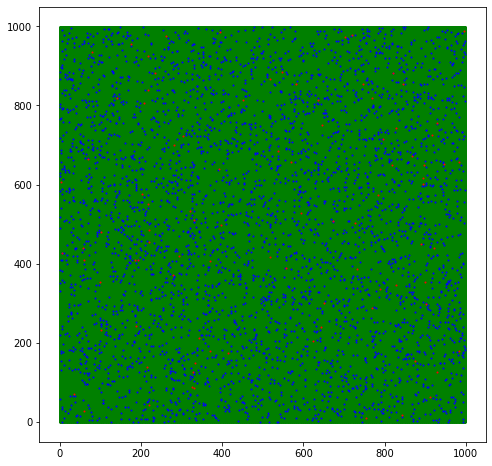

In [ ]:
import matplotlib.pyplot as plt

x = list()
x2 = list()
x3 = list()
y = list()
y2 = list()
y3 = list()
fig, ax = plt.subplots(figsize=(8,8))
#plt.figure(figsize=(1,1))
for i in range(len(pointsEntrega)):
  x.append(pointsEntrega[i][0])
  y.append(pointsEntrega[i][1])
  
for i in range(len(pointsAlmacenes)):
  x2.append(pointsAlmacenes[i][0])
  y2.append(pointsAlmacenes[i][1])
  
for i in range(len(extraPoints)):
  x3.append(extraPoints[i][0])
  y3.append(extraPoints[i][1])

ax.scatter(x3,y3,color='green',s=1)
ax.scatter(x,y,color='blue',s=1)
ax.scatter(x2,y2,color='red',s=1)
plt.show()